<a href="https://colab.research.google.com/github/soledad-villarrubia/Data_Sciense_1/blob/main/Primer_entrega_Ciencia_de_Datos_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satisfacción de los Pasajeros de Aerolíneas

Factores que Influyen en la Experiencia del Cliente

**Introducción:**

El transporte aéreo constituye un componente fundamental de la economía global, facilitando la conectividad entre regiones, impulsando el turismo y dinamizando el comercio internacional.

En este contexto, la satisfacción de los pasajeros se presenta como un factor clave para el éxito de las aerolíneas, ya que influye directamente en la lealtad del cliente, la reputación de la marca y la rentabilidad del negocio.

Este estudio se enfoca en analizar la experiencia de los pasajeros en vuelos comerciales, utilizando un conjunto de datos basado en encuestas de satisfacción.

**Fuente:**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


El objetivo principal es identificar los factores que tienen mayor impacto en la percepción del servicio y evaluar si es posible predecir el nivel de satisfacción de los pasajeros a partir de variables específicas.

Las variables incluidas en el análisis abarcan tanto características demográficas como aspectos operativos y de servicio:

- Género: Femenino / Masculino

- Tipo de Cliente: Leal / Desleal

- Edad: Edad del pasajero

- Tipo de Viaje: Personal / Negocios

- Clase de Servicio: Business / Económica / Económica Plus

- Distancia del Vuelo

- Satisfacción con Servicios Específicos: Wifi a bordo, Horarios de salida/llegada
Reserva online, Ubicación de la puerta de embarque, Comida y bebida, Embarque online, Comodidad del asiento, Entretenimiento a bordo, Servicio a bordo
Espacio para las piernas, Manejo de equipaje, Check-in
Limpieza.

- Retrasos: Minutos de retraso en la salida y Minutos de retraso en la llegada

- Nivel de Satisfacción General: Satisfecho / Neutral / Insatisfecho


# Integrantes:
Bochatay, Karen Ailén

Gómez, María Belén

Oradini, Jorgelina Marisol

Rojas, Tomás

Villarrubia Dos Santos, Soledad Magalí






# Importación de Librerías y Carga de Datos


In [2]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np

sns.set(style="whitegrid")  # Estilo más profesional

In [ ]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)

In [1]:
import requests

url = "https://github.com/soledad-villarrubia/Data_Sciense_1/raw/refs/heads/main/Dataset%20Proyecto%20Coderhouse%20Satisfacci%C3%B3n%20Clientes%20en%20Aerolineas.csv"

response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado
response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo
id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo


# Análisis exploratorio

In [ ]:
df = pd.read_csv(url, sep=';', encoding='latin1') # lee el archivo,

df.head()# Muestra las primeras 5 filas

,id_Encuesta,Identificación,Género,Tipo de Cliente,Edad,Tipo de Viaje,Clase,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,...,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos,Satisfacción
0,0,19556,Femenino,Leal Cliente,52,Negocios Viaje,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfecho/a
1,1,90035,Femenino,Leal Cliente,36,Negocios Viaje,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfecho/a
2,2,12360,Masculino,Desleal Cliente,20,Negocios Viaje,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral o insatisfecho/a
3,3,77959,Masculino,Leal Cliente,44,Negocios Viaje,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfecho/a
4,4,36875,Femenino,Leal Cliente,49,Negocios Viaje,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfecho/a


In [ ]:
df.describe()  # Estadísticas básicas de columnas numéricas

,id_Encuesta,Identificación,Edad,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Comida y bebida,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [ ]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_Encuesta                           25976 non-null  int64  
 1   Identificación                        25976 non-null  int64  
 2   Género                                25976 non-null  object 
 3   Tipo de Cliente                       25976 non-null  object 
 4   Edad                                  25976 non-null  int64  
 5   Tipo de Viaje                         25976 non-null  object 
 6   Clase                                 25976 non-null  object 
 7   Distancia de Vuelo                    25976 non-null  int64  
 8   Servicio de wifi a bordo              25976 non-null  int64  
 9   Hora de salida/llegada conveniente    25976 non-null  int64  
 10  Facilidad de reserva en línea         25976 non-null  int64  
 11  Ubicación de la

In [ ]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [ ]:
df["Retraso en la llegada en minutos"].fillna("No", inplace=True)##rellena los vacios con "No_encontrado"

In [ ]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [ ]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

In [ ]:
df['Retraso en la llegada en minutos'] = pd.to_numeric(df['Retraso en la llegada en minutos'], errors='coerce') #verificamos valores con error

In [ ]:
df['Retraso en la llegada en minutos'].isna().sum() # transformamos los valores inválidos

np.int64(83)

In [ ]:
df['Retraso en la llegada en minutos'].fillna(0, inplace=True) #Revisamos si hay NaN

In [ ]:
df['Retraso en la llegada en minutos'] = df['Retraso en la llegada en minutos'].astype('int64') #rellenamos con 0 los NaN

In [ ]:
df.info()      # muestra tipos de datos con los cambios realizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

In [ ]:
df.Satisfacción.unique()

array(['satisfecho/a', 'neutral o insatisfecho/a'], dtype=object)

In [ ]:
# Convertir las columnas a tipo numérico, si es necesario
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Distancia de Vuelo'] = pd.to_numeric(df['Distancia de Vuelo'], errors='coerce')

# Excluir columnas específicas
columns_to_exclude = ['id_Encuesta', 'Identificación']

# Filtrar el DataFrame para excluir las columnas no deseadas
filtered_df = df.drop(columns=columns_to_exclude)

# Agrupar por Satisfacción y calcular la media
grouped_satisfaccion = filtered_df.groupby('Satisfacción').mean(numeric_only=True)

# Mostrar el resultado
print(grouped_satisfaccion)

                               Edad  Distancia de Vuelo  \
Satisfacción                                              
neutral o insatisfecho/a  37.991628          932.929253   
satisfecho/a              41.703236         1527.165746   

                          Servicio de wifi a bordo  \
Satisfacción                                         
neutral o insatisfecho/a                  2.393536   
satisfecho/a                              3.148031   

                          Hora de salida/llegada conveniente  \
Satisfacción                                                   
neutral o insatisfecho/a                            3.134701   
satisfecho/a                                        2.934491   

                          Facilidad de reserva en línea  \
Satisfacción                                              
neutral o insatisfecho/a                       2.559665   
satisfecho/a                                   3.008682   

                          Ubicación de la puerta  Co

Este cálculo me permite agrupar por la columna "Satisfacción", para comparar métricas promedio entre distintos niveles de satisfacción.

**Acciones realizadas:**
- Para este análisis se convierten columnas a tipo numérico para asegurar que los cálculos sean precisos.

- Se excluyen columnas irrelevantes como id, indicador, e Identificación, lo que mejora la calidad del análisis.

**Primeras observaciones detectadas:**

- De este análisis podemos detectar que existen variables con promedios bajos en el grupo de "neutral o insatisfecho/a", como "Servicio de wifi a bordo" o "Facilidad de reserva en línea", podrían indicar áreas de mejora.

- Las diferencias en las medias de "Edad" y "Distancia de Vuelo" entre los grupos pueden indicar que diferentes segmentos demográficos o tipos de clientes tienen experiencias distintas.

- Los promedios de "Retraso en la salida en minutos" y "Retraso en la llegada en minutos" pueden ser cruciales, ya que los retrasos pueden afectar significativamente la satisfacción del cliente. Y se puede observar diferencias importantes entre unos y otros.


# Hipótesis planteadas

1.	**Patrones de Satisfacción**: se espera que los clientes leales y aquellos que viajan en clases superiores reporten mayores niveles de satisfacción.

2.	**Impacto de los Retrasos:** los retrasos en la salida y llegada se anticipan como factores negativos en la percepción del servicio.

3.	**Preferencias por Edad:** se plantea que los pasajeros más jóvenes prefieren vuelos de corta distancia, lo que podría influir en su nivel de satisfacción.

4.	**Calidad del Servicio:** se propone que existe una correlación positiva entre la calidad de servicios específicos (como wifi y comodidad del asiento) y la satisfacción general.


# Visualizaciones

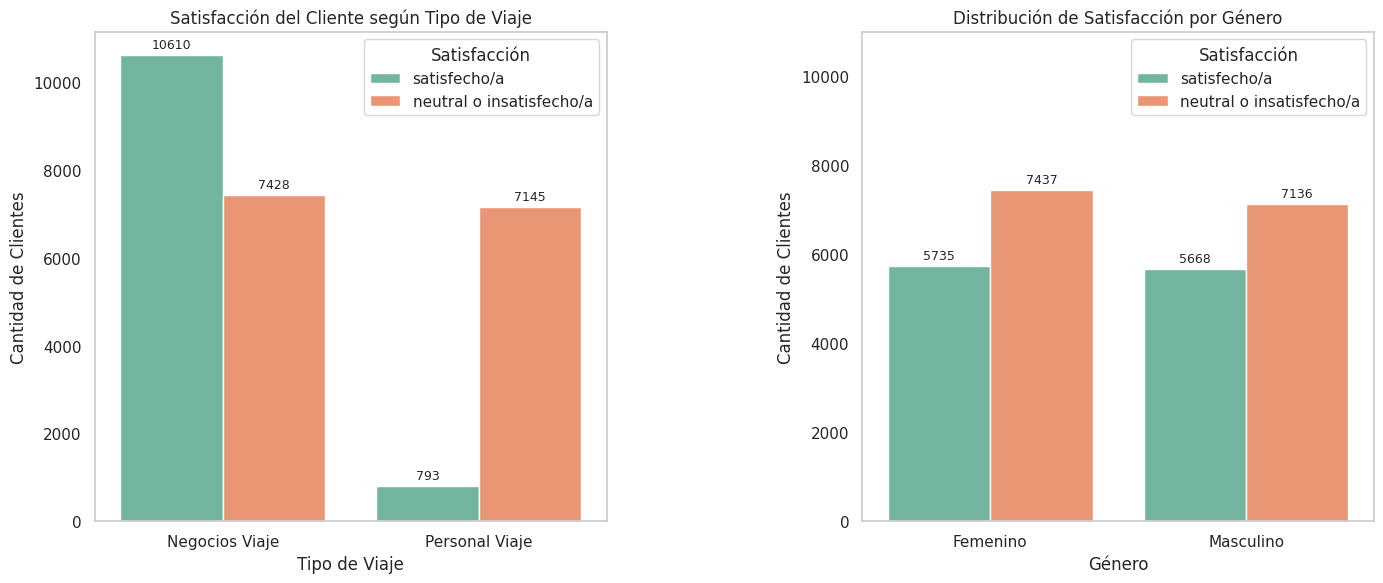

In [ ]:
# Gráficos de Barras de Satisfacción de los Clientes de Aerolíneas por Tipo de Viaje y Género.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico: Satisfacción según Tipo de Viaje
sns.countplot(data=df, x='Tipo de Viaje', hue='Satisfacción', palette='Set2', ax=ax1)
ax1.set_title('Satisfacción del Cliente según Tipo de Viaje')
ax1.set_ylabel('Cantidad de Clientes')
ax1.grid(False) # Remove gridlines

# Agregar etiquetas a cada barra en el primer gráfico
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Segundo gráfico: Satisfacción según Tipo de Género
sns.countplot(data=df, x='Género', hue='Satisfacción', palette='Set2', ax=ax2)
ax2.set_title('Distribución de Satisfacción por Género')
ax2.set_ylabel('Cantidad de Clientes')
ax2.grid(False) # Remove gridlines


# Agregar etiquetas a cada barra en el segundo gráfico
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Ajustar el diseño para que no se superpongan los elementos
plt.tight_layout()
plt.ylim(0, 11000)

# Ajustar espacio entre gráficos (wspace controla el espacio horizontal)
plt.subplots_adjust(wspace=0.5)  # Aumenta este valor para más espacio

# Mostrar los gráficos
plt.show()

El objetivo de estos dos gráficos es poder visualizar la Satisfacción de los Clientes de Aerolíneas por Tipo de Viaje y Género.


**Gráfico por Tipo de Viaje**:

Este gráfico muestra que el Tipo de Viaje es el factor crítico de Satisfacción. Hay una desigualdad masiva en la experiencia que la aerolínea ofrece:
- Viajeros de Negocios: Reciben un servicio que los satisface.
- Viajeros Personales: Reciben un servicio que los deja profundamente insatisfechos.

Posibles Causas:
- Inversión Diferenciada: La aerolínea invierte más recursos, mejores aviones y mejor personal en las rutas/clases de negocios.
- Políticas Comerciales: Los viajes de negocios suelen ser en clases premium (Business/First), mientras que los personales son en Económica.
- Gestión de Recursos: En caso de overbooking o problemas, se prioriza al cliente de negocios.
- Expectativas: El viajero de negocios tiene expectativas diferentes (puntualidad, conectividad) vs. el personal (precio, comodidad familiar).




**Gráfico por Género:**

En este caso el género NO es un factor determinante de insatisfacción, es decir, la satisfacción del cliente con la aerolínea no varía significativamente según si es hombre o mujer.
Esto sugiere que las causas de la insatisfacción son transversales y probablemente se relacionen más con:
- La experiencia operativa (retrasos, cancelaciones).
- La calidad del servicio (comodidad, comida, atención).
- El tipo de viaje o clase de cabina.

Dado que los niveles de insatisfacción son consistentes entre géneros, las iniciativas de mejora deben ser holísticas y centrarse en los problemas generales de la experiencia de vuelo.
Para identificar las causas raíz, es necesario analizar la interacción del género con variables críticas como: el propósito del viaje, la clase, la edad, la lealtad del pasajero y los retrasos operativos.

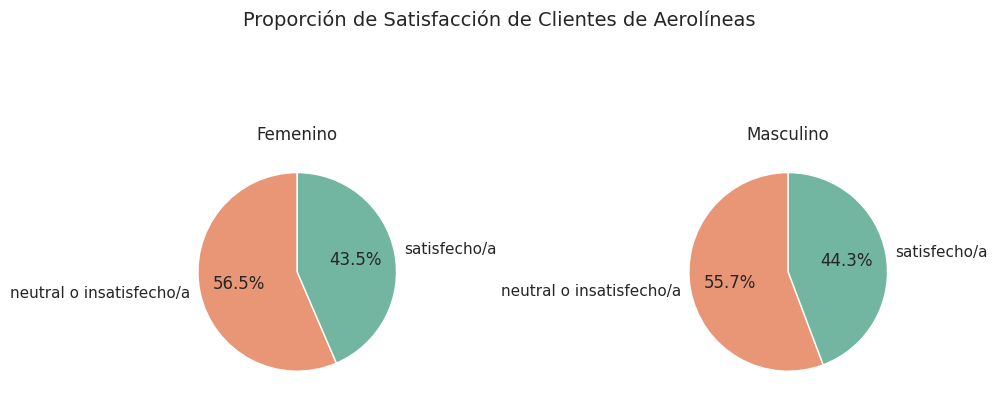

In [ ]:
# Gráfico de Torta para determinar la proporción de Satisfacción por Género

# Agrupamos por Género y Satisfacción
genero_satisfaccion = df.groupby(["Género", "Satisfacción"]).size().unstack()

# Gráficos de torta lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colores = ["#e89675" , "#72b5a0"]

# Femenino
genero_satisfaccion.loc["Femenino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[0], colors=colores, startangle=90
)
axes[0].set_ylabel("")
axes[0].set_title("Femenino")

# Masculino
genero_satisfaccion.loc["Masculino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[1], colors=colores, startangle=90
)
axes[1].set_ylabel("")
axes[1].set_title("Masculino")

plt.suptitle("Proporción de Satisfacción de Clientes de Aerolíneas", fontsize=14)
plt.tight_layout()
plt.show()

Este gráfico nos muestra que más de la mitad de los clientes están insatisfechos, independientemente de su género, es decir, los problemas son sistémicos y afectan a toda la base de clientes.

Contrario al gráfico anterior, aquí vemos que sí existe una diferencia por género, aunque pequeña. Las mujeres reportan niveles de insatisfacción consistentemente más altos en 0.8 puntos porcentuales.

Esto podría indicar que las mujeres podrían tener expectativas más altas en ciertos servicios, ser más sensibles a factores como limpieza, seguridad o trato personal o podrían estar más expuestas a diferentes tipos de problemas operativos.



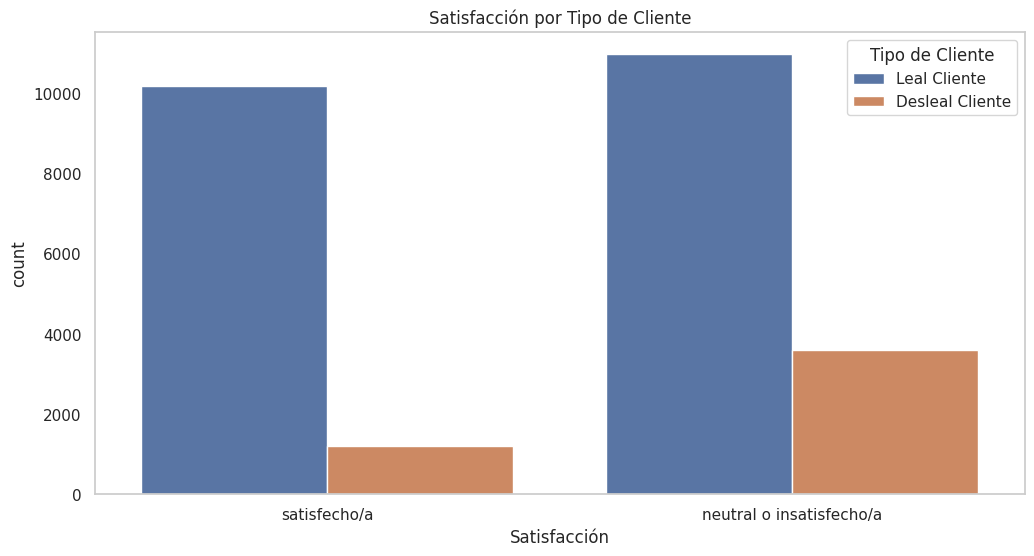

In [ ]:
# Gráfico de barras para Satisfacción por Tipo de Cliente
ax = sns.countplot(data=df, x='Satisfacción', hue='Tipo de Cliente')
plt.title('Satisfacción por Tipo de Cliente')
ax.grid(False) # Remove gridlines
plt.show()

# Hipótesis 2: Análisis de la Satisfacción por Distancias de Vuelos e Impacto de los Retrasos

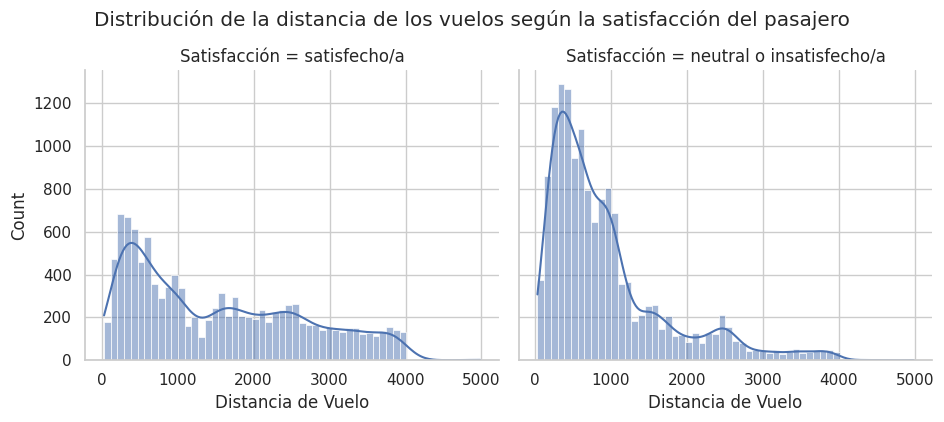

In [ ]:
# Displot: Distribución de la distiancia de los vuelos según la satisfaccion del pasajero
sns.displot(data=df, x='Distancia de Vuelo', col='Satisfacción', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de la distancia de los vuelos según la satisfacción del pasajero', y=1.05) # Título general ajustado
plt.show()

Este gráfico muestra la distribución de las distancias de vuelo para pasajeros Satisfechos vs. Insatisfechos, en el cual se puede observar que los vuelos cortos son una fuente crítica de insatisfacción.

El hecho de que los insatisfechos se concentren más en el primer pico (0-1000 km) sugiere que los vuelos domésticos o regionales (cortos) tienen niveles de servicio más bajos.

También podría indicar problemas como retrasos, asientos incómodos y mal servicio impactan más en vuelos cortos donde las expectativas de confort son diferentes.

La caída en el número de insatisfechos a medida que aumenta la distancia podría implicar que, en vuelos más largos, los pasajeros pueden tener expectativas diferentes o que el servicio tiende a mejorar.


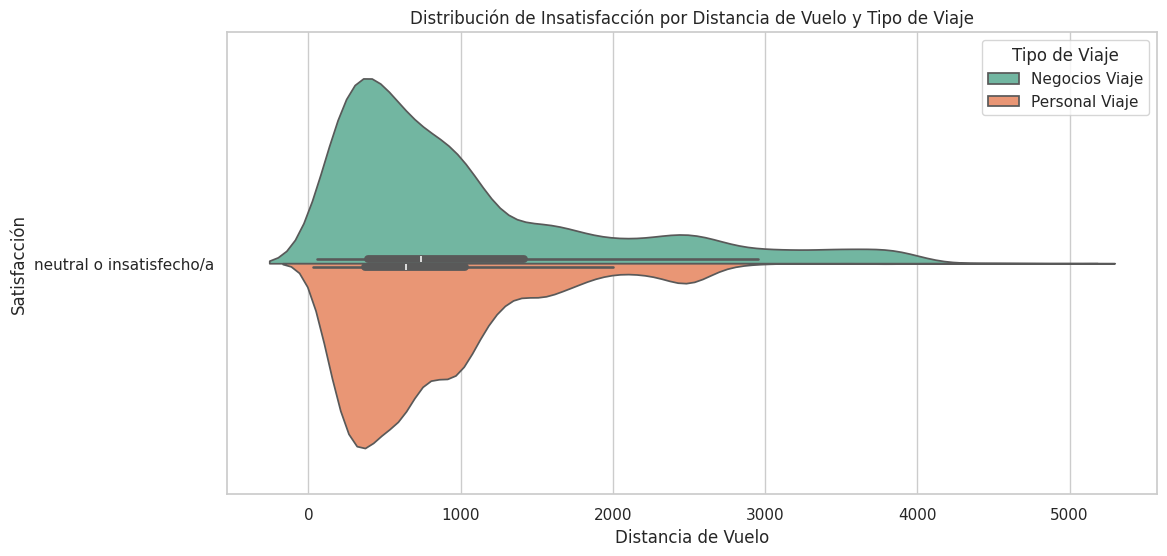

In [ ]:
# Gráfico para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 'neutral o insatisfecho/a']

# Gráfico de violín para analizar la distribución de los insatisfechos por tipo de viaje
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_insatisfechos, x='Distancia de Vuelo', y='Satisfacción', hue='Tipo de Viaje', palette='Set2', split=True)

# Títulos y etiquetas
plt.title('Distribución de Insatisfacción por Distancia de Vuelo y Tipo de Viaje')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Satisfacción')

plt.show()

Este gráfico muestra la distribución de la insatisfacción en función de la distancia del vuelo y el tipo de viaje.

Podemos ver que la mayor densidad de ambos violines está en el rango de 0-2000 km confirmando que los vuelos domésticos y regionales son la mayor fuente de problemas. Esto está alineado con el gráfico anterior.

La forma más ancha y aplanada del violín para viajes personales indica que:

- Hay muchos más pasajeros insatisfechos en viajes personales que en viajes de negocios para la misma distancia.

- La experiencia en vuelos cortos es especialmente mala para turistas y familias.


En cambio, los Viajes de Negocios Tienen Menos Variabilidad. La distribución más estrecha y concentrada para viajes de negocios sugiere que:

- Este grupo experimenta problemas más consistentes (probablemente relacionados con retrasos y eficiencia).

- Están menos expuestos a malas experiencias extremas en comparación con los viajeros personales.

Aunque se concentra en vuelos cortos, la insatisfacción existe en todas las distancias, como lo muestran las "colas" de los violines que se extienden hasta los 5000+ km.


# Hipótesis 3: Preferencias por Edad

In [ ]:
# Agrupar por Edad y Distancia de Vuelo
age_distance_satisfaction = df.groupby(['Edad', 'Distancia de Vuelo']).agg({'Satisfacción': lambda x: x.map({'satisfecho/a': 1, 'neutral o insatisfecho/a': 0}).mean()})

# Mostrar el resultado
print(age_distance_satisfaction)

                         Satisfacción
Edad Distancia de Vuelo              
7    77                           0.0
     89                           0.0
     109                          0.0
     110                          0.0
     166                          0.0
...                               ...
85   325                          1.0
     486                          0.0
     954                          0.0
     992                          1.0
     2971                         1.0

[20934 rows x 1 columns]


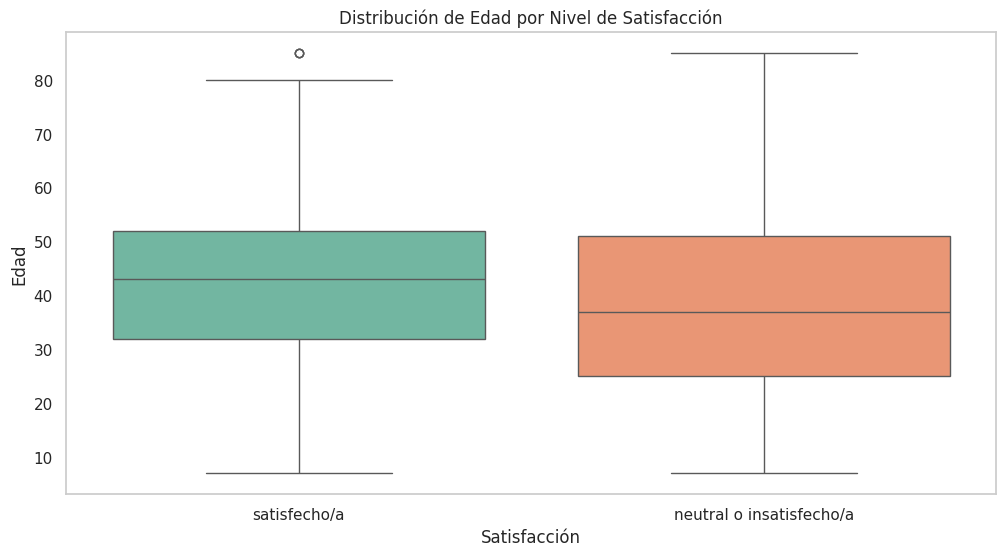

In [ ]:
# Boxplot: Distribución de la satisfacción por edad
ax = sns.boxplot(data=df, x="Satisfacción", y="Edad", palette="Set2")
plt.title("Distribución de Edad por Nivel de Satisfacción")
plt.xlabel("Satisfacción")
plt.ylabel("Edad")
ax.grid(False) # Remove gridlines
plt.show()

Este gráfico es un boxplot o diagrama de caja y bigotes que muestra la distribución de la edad por nivel de satisfacción. Sirve para entender el perfil demográfico de los clientes satisfechos vs. insatisfechos.

**Observaciones Claves**:

1.	Mediana Similar:
En ambas cajas (satisfechos e insatisfechos) tienen la mediana (la línea dentro de la caja) aproximadamente en la misma edad (alrededor de 40 años). Esto indica que la edad central no varía significativamente entre los grupos.

2.	Rango Intercuartílico (IQR) - La "Caja":
La caja del grupo insatisfecho es ligeramente más alta y ancha, lo que podria significar que hay más variabilidad en las edades de los clientes insatisfechos. El grupo de los satisfechos es más homogéneo en edad.

3.	Bigotes y Outliers (Valores Atípicos):

El bigote superior (Q3 + 1.5*IQR) del grupo insatisfecho es más largo, extendiéndose hasta cerca de los 60 años. Esto muestra que hay una cantidad considerable de personas mayores de 50 años en el grupo de insatisfechos.

El grupo de satisfechos tiene un bigote superior más corto, con pocos outliers por encima de los 60 años.

Conclusiones Principales:
1. La edad no es un predictor directo de Satisfacción, la mediana similar nos dice que no existe una edad "típica" para un cliente satisfecho o insatisfecho. Un pasajero de 40 años tiene la misma probabilidad estadística de estar en uno u otro grupo.

2. Los pasajeros de mayor edad tienden a ser más críticos, la mayor dispersión y los bigotes más largos en el grupo de insatisfechos, especialmente hacia arriba, sugieren que los pasajeros de mayor edad (50+ años) están sobrerrepresentados en el grupo de insatisfechos.

Esto podría deberse a:
- Mayores expectativas: Pasajeros con más experiencia de vuelo y estándares más altos.
- Necesidades específicas: Mayor sensibilidad a la comodidad del asiento, espacio para las piernas, asistencia y tranquilidad.
- Menor tolerancia a las molestias: Menos paciencia con los retrasos, el ruido o la falta de confort.

3. Los Pasajeros Satisfechos son un Grupo Más "Joven" y Homogéneo
La caja más compacta sugiere que los clientes satisfechos se concentran en un rango de edad más estrecho (aproximadamente entre 30 y 50 años), mostrando menos variabilidad.


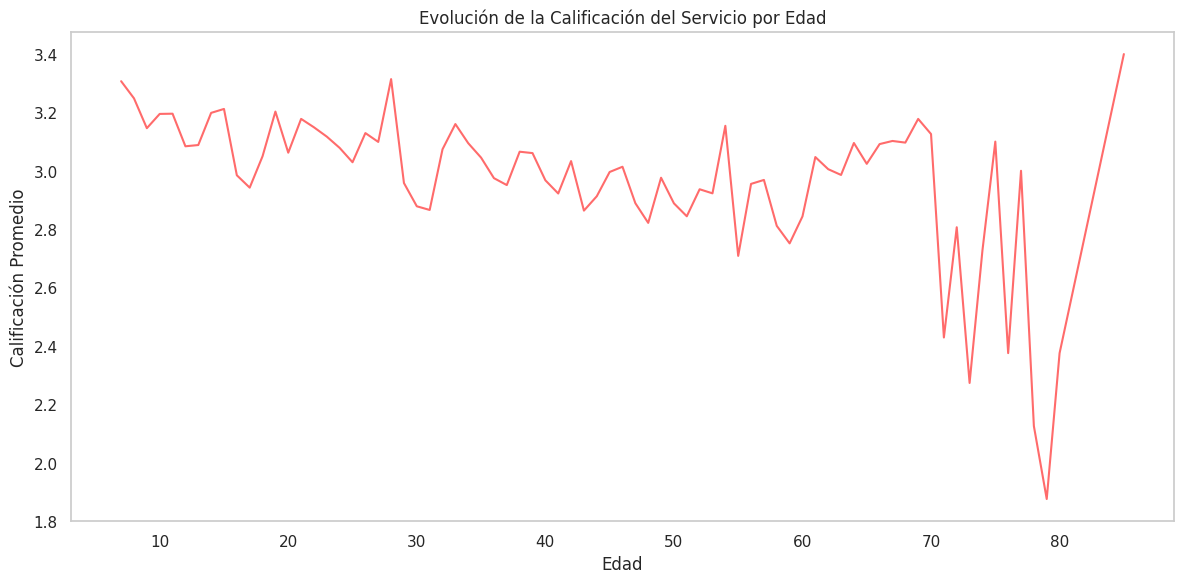

In [ ]:
#  Gráfico de Líneas para Tendencias por Edad para ver cómo cambia la satisfacción con la edad.
plt.figure(figsize=(12, 6))
df_insatisfechos.groupby('Edad')['Servicio a bordo'].mean().plot(kind='line', color='#ff6b6b')
plt.title('Evolución de la Calificación del Servicio por Edad')
plt.xlabel('Edad')
plt.ylabel('Calificación Promedio')
plt.grid(False) # Remove gridlines
plt.tight_layout()
plt.show()

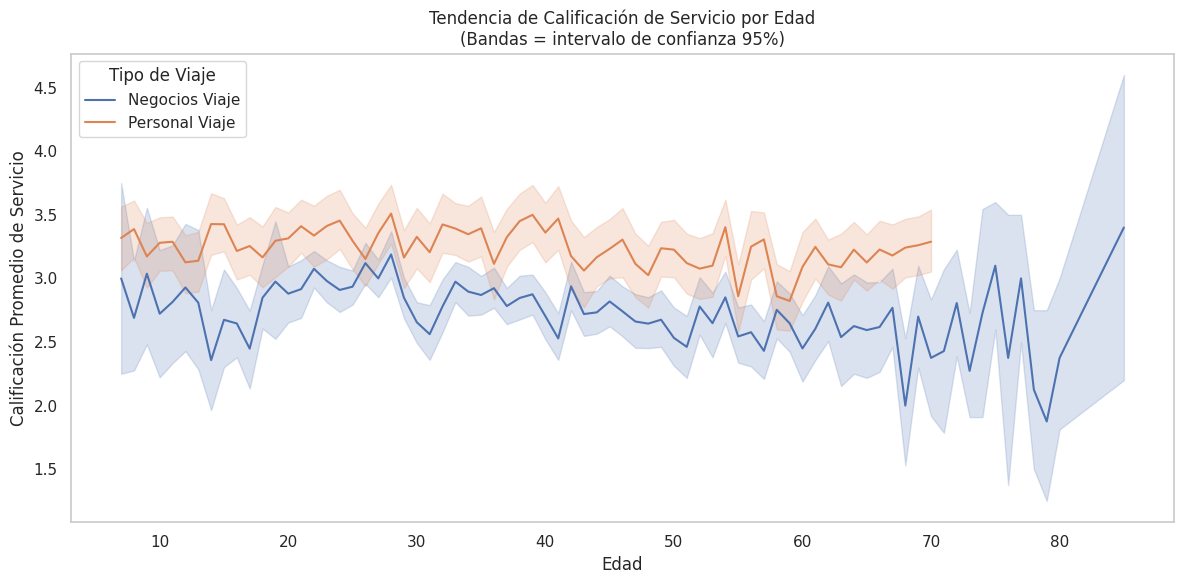

In [ ]:
# Gráfico de Tendencia con Bandas de Confianza para ver tendencias con intervalos de confianza.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_insatisfechos, x='Edad', y='Servicio a bordo',
             hue='Tipo de Viaje', err_style='band', ci=95)
plt.title('Tendencia de Calificación de Servicio por Edad\n(Bandas = intervalo de confianza 95%)')
plt.ylabel('Calificación Promedio de Servicio')
plt.grid(False) # Remove gridlines
plt.tight_layout()
plt.show()

# Hipótesis 4: Calidad del Servicio

In [ ]:
#Gráfico de promedio por motivo y satisfacción
motivos = ['Hora de salida/llegada conveniente', 'Facilidad de reserva en línea', 'Ubicación de la puerta','Comida y bebida','Embarque en línea', 'Comodidad del asiento', 'Entretenimiento a bordo', 'Servicio a bordo', 'Servicio de espacio para las piernas', 'Manejo de equipaje', 'Servicio de facturación', 'Servicio a bordo.1' , 'Limpieza' ]
#defino todos los motivos de puntuación del 1 al 5 bajo "motivos"

In [ ]:
#Gráfico de promedio por motivo y satisfacción
df.melt(id_vars=['Satisfacción'], value_vars=motivos,
        var_name='motivos', value_name='Puntuacion')
# Transformo el DataFrame a formato largo: dejo 'Satisfacción' fija y convierto los motivos en filas

,Satisfacción,motivos,Puntuacion
0,satisfecho/a,Hora de salida/llegada conveniente,4
1,satisfecho/a,Hora de salida/llegada conveniente,1
2,neutral o insatisfecho/a,Hora de salida/llegada conveniente,0
3,satisfecho/a,Hora de salida/llegada conveniente,0
4,satisfecho/a,Hora de salida/llegada conveniente,3
...,...,...,...
337683,neutral o insatisfecho/a,Limpieza,4
337684,satisfecho/a,Limpieza,4
337685,neutral o insatisfecho/a,Limpieza,2
337686,satisfecho/a,Limpieza,4


In [ ]:
df['Satisfacción'] = df['Satisfacción'].map({'neutral o insatisfecho/a': 0, 'satisfecho/a': 1})

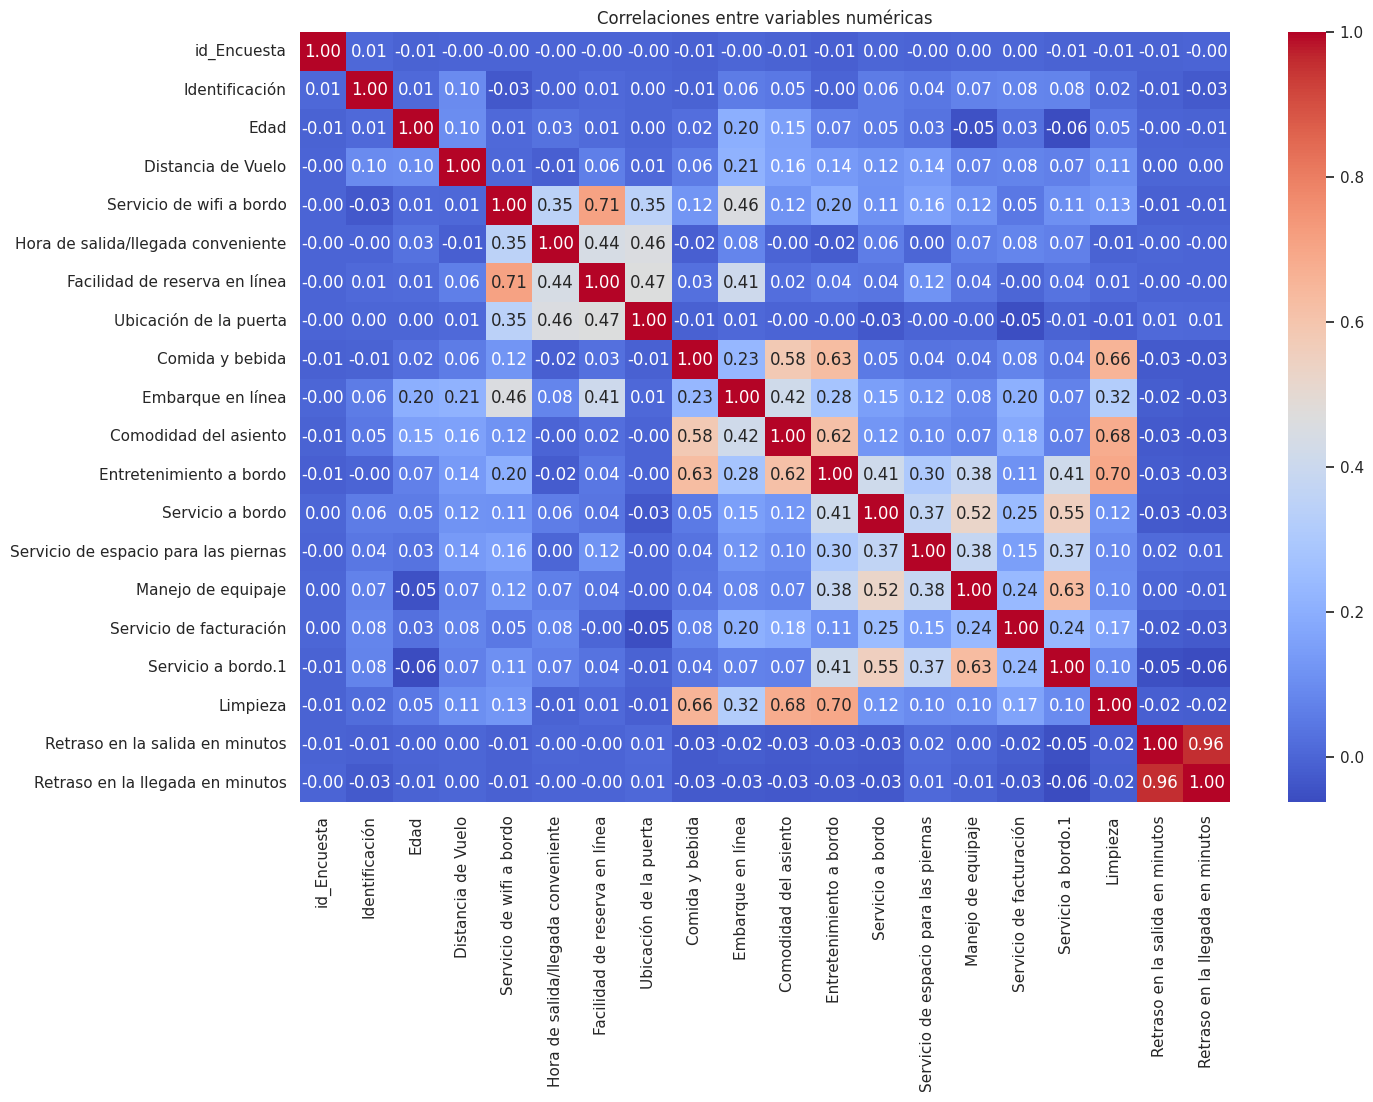

In [ ]:
# Mapa de calor de correlaciones
import numpy as np
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

En esta imagen podemos visualizar un mapa de calor de correlaciones entre los motivos de satisfacción.


**1. Correlaciones Positivas y Significativas:**

- Facilidad de reserva en línea (0.71): Esta variable tiene una correlación fuerte y positiva con la satisfacción. Mejorar la experiencia de reserva puede ser crucial para aumentar la satisfacción de los pasajeros.

- Comodidad del asiento (0.58) y Limpieza (0.66): Ambas variables también tienen correlaciones positivas significativas, indicando que los pasajeros valoran un espacio cómodo y un ambiente limpio. Mejorar estos aspectos podría impactar positivamente la satisfacción.

- Retraso en la salida y retraso en la llegada también tienen una correlación positiva alta entre sí (0.96), lo que indica que los vuelos que salen tarde también tienden a llegar tarde. Esto puede señalar problemas sistémicos en la operación que afectan múltiples etapas del viaje.


**2. Correlaciones Negativas:**
- Retraso en la llegada (-0.56) y Retraso en la salida (-0.43): Estas variables tienen correlaciones negativas con la satisfacción, lo que indica que los retrasos tienen un impacto considerablemente negativo en la experiencia del pasajero. Minimizar los retrasos debería ser una prioridad.

**3. Relaciones Moderadas:**
- Servicio a bordo (0.37) y Entretenimiento a bordo (0.42): Estas variables muestran correlaciones moderadas con la satisfacción del cliente,lo que sugiere que son importantes pero no determinantes por sí solos. No obstante, mejorar la calidad del servicio y las opciones de entretenimiento pueden contribuir a una mejor experiencia.

**4. Variables con Baja Correlación:**
- Edad (0.01) y Distancia de Vuelo (0.05): Estas variables no parecen tener un impacto significativo en la satisfacción de los pasajeros insatisfechos. Esto puede indicar que otros factores son más determinantes en la experiencia del cliente que su edad o la longitud del vuelo.

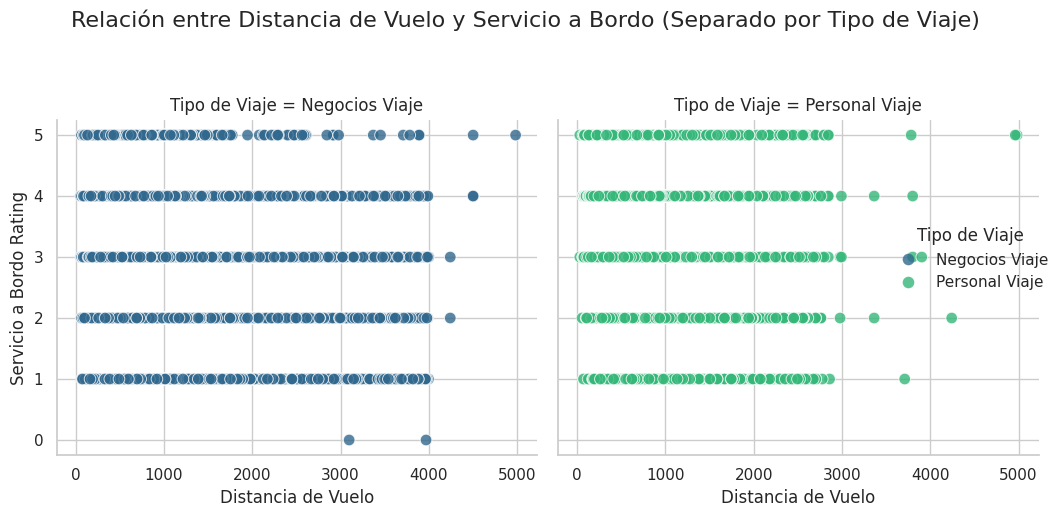

In [ ]:
# Filtrar el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 0]

# Crear el gráfico relplot using relevant columns
sns.relplot(data=df_insatisfechos, x='Distancia de Vuelo', y='Servicio a bordo', hue='Tipo de Viaje', col='Tipo de Viaje',
kind='scatter', height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Servicio a Bordo (Separado por Tipo de Viaje)', y=1.03, fontsize=16)

# Ajustar etiquetas individualmente si es necesario
plt.gcf().axes[0].set_xlabel("Distancia de Vuelo")
plt.gcf().axes[0].set_ylabel("Servicio a Bordo Rating")
# Remover líneas de referencias
sns.set_style("white")

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

**Observaciones Claves:**

El gráfico separa claramente los datos entre viajes de negocios y personales. Esto permite observar cómo cada tipo de viaje afecta la percepción del servicio a bordo.


A medida que aumenta la distancia del vuelo, las calificaciones del servicio a bordo no parecen mostrar una tendencia clara, ya que hay puntuaciones similares tanto para vuelos cortos como largos en ambos tipos de viaje. Esto indica que la aerolínea mantiene un estándar de servicio constante


La mayoría de las puntuaciones de servicio a bordo parecen concentrarse en el rango de 2 a 5, lo que indica que, aunque hay variaciones, la mayoría de los pasajeros perciben el servicio a bordo de manera relativamente positiva.


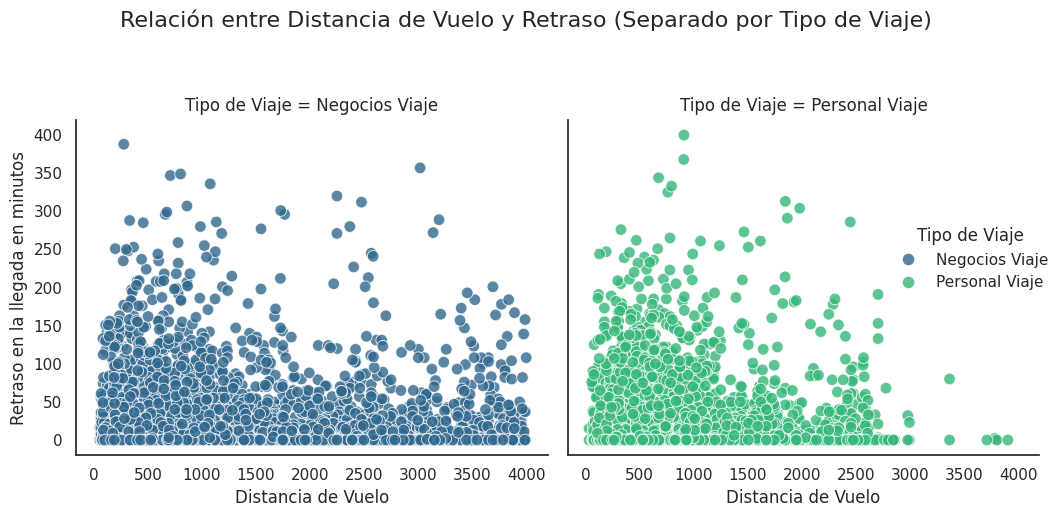

In [ ]:
# Filtramos el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 0] # Filtrar utilizando el valor numérico 0

#filtro para eliminar outliers, distancia de vuelo > 4000 y retrasos en la llegada > 400 minutos
df_filtrado = df_insatisfechos[(df_insatisfechos['Distancia de Vuelo'] <= 4000) & (df_insatisfechos['Retraso en la llegada en minutos'] <= 400)]

# Crear el gráfico relplot
sns.relplot(data=df_filtrado, x='Distancia de Vuelo', y='Retraso en la llegada en minutos',
hue='Tipo de Viaje', col='Tipo de Viaje',
kind='scatter', height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Retraso (Separado por Tipo de Viaje)', y=1.03, fontsize=16)

# Ajustar etiquetas individualmente si es necesario
plt.gcf().axes[0].set_xlabel("Distancia de Vuelo")
plt.gcf().axes[0].set_ylabel("Retraso en la llegada en minutos")

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

Observaciones Claves:

Este gráfico muestra la relación entre la distancia de vuelo y el retraso en la llegada, diferenciando entre viajes de negocios y viajes personales, específicamente para pasajeros insatisfechos.

1. Diferencias por tipo de viaje:

- Viajes de negocios (panel izquierdo): Los puntos en el gráfico de viajes de negocios tienden a estar más concentrados en distancias más cortas y presentan una mayor cantidad de retrasos moderados, lo que podría indicar una expectativa más alta de puntualidad entre los viajeros de negocios. Es decir, los pasajeros de negocios experimentan más variabilidad en la puntualidad, lo que podría afectar negativamente su satisfacción, dado que suelen tener agendas más estrictas.

- Viajes personales (panel derecho): aunque también hay dispersión, los retrasos extremos son menos frecuentes. Solo se observan algunos casos con retrasos muy altos (por encima de 800 minutos), pero son relativamente raros, y por ese motivo consideramos necesario filtrar la vista del gráfico para ignorar estos outliers del presente análisis. Esto podría indicar que los pasajeros personales son menos afectados por los retrasos o que podrían ser más flexibles con los tiempos de llegada.

En ambos tipos de viaje, se observa que a mayor distancia de vuelo, mayor posibilidad de retraso. Dado que el mayor retraso en la llegada, para los dos tipos de viajes, se producen para los vuelos con una distancia menor a 4000 km y existen solamente algunos casos en distancias mayores a dicho valor, decidimos crear un filtro para que no distorsione la calidad en los resultados del análisis.

Esto puede deberse a factores como mayor complejidad logística, condiciones climáticas, o congestión en aeropuertos internacionales.

Dado que el gráfico se basa en pasajeros insatisfechos, se puede inferir que los retrasos en vuelos largos son un factor importante de insatisfacción, especialmente en el segmento de viajes de negocios.

Esto sugiere que mejorar la puntualidad en vuelos largos podría tener un impacto significativo en la percepción del servicio.

Text(0.5, 1.03, 'Relación entre Distancia de Vuelo y Comodidad del Asiento')

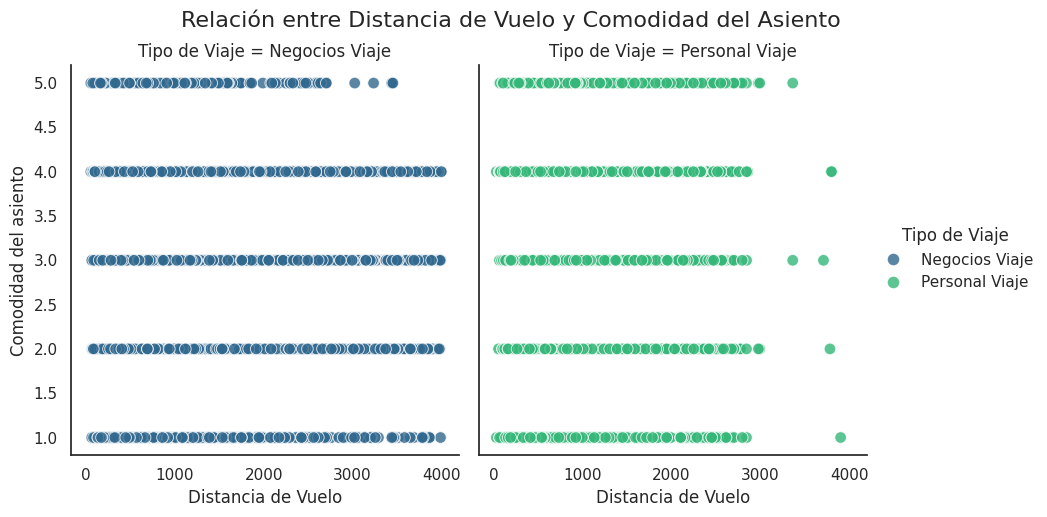

In [ ]:
# Para una visión más amplia de la insatisfacción:

#filtro para eliminar outliers, distancia de vuelo menor a 4000km
df_filtrado = df_insatisfechos[df_insatisfechos['Distancia de Vuelo'] <= 4000]

# Servicio a bordo vs Comodidad del asiento (crucial para viajes largos)
sns.relplot(data=df_filtrado, x='Distancia de Vuelo', y='Comodidad del asiento',
            hue='Tipo de Viaje', col='Tipo de Viaje', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Comodidad del Asiento', y=1.03, fontsize=16)


**Observaciones Claves:**

Este gráfico analiza la relación entre la distancia de vuelo y la comodidad del asiento, diferenciando entre viajes de negocios y viajes personales.


**1. Diferencias por tipo de viaje:**
- Viajes de negocios (panel izquierdo): los puntos azules muestran una mayor dispersión en la comodidad del asiento a medida que aumenta la distancia del vuelo. Esto sugiere que en vuelos largos de negocios, la comodidad del asiento varía considerablemente, lo que podría influir en la satisfacción del pasajero.

- Viajes personales (panel derecho): los puntos verdes tienden a estar más concentrados, lo que indica una experiencia más homogénea en cuanto a comodidad, independientemente de la distancia. Esto podría reflejar que los pasajeros personales tienen expectativas más estables o que los vuelos personales suelen ser más cortos y menos variables en calidad.

**2. Relación entre distancia y comodidad:**

No parece haber una correlación clara entre la distancia del vuelo y la comodidad del asiento en ninguno de los tipos de viaje.
Esto sugiere que la comodidad no está directamente relacionada con la duración del vuelo, sino posiblemente con otros factores como la clase del asiento, la aerolínea o el tipo de avión.

**3. Implicancias para la experiencia del cliente:**
Para los viajes de negocios, donde la comodidad varía más, podría ser útil estandarizar o mejorar la calidad de los asientos en vuelos largos, ya que estos pasajeros suelen ser más exigentes.
En los viajes personales, la comodidad parece más consistente, pero aún así podría mejorarse para vuelos más largos, donde el confort es más necesario.





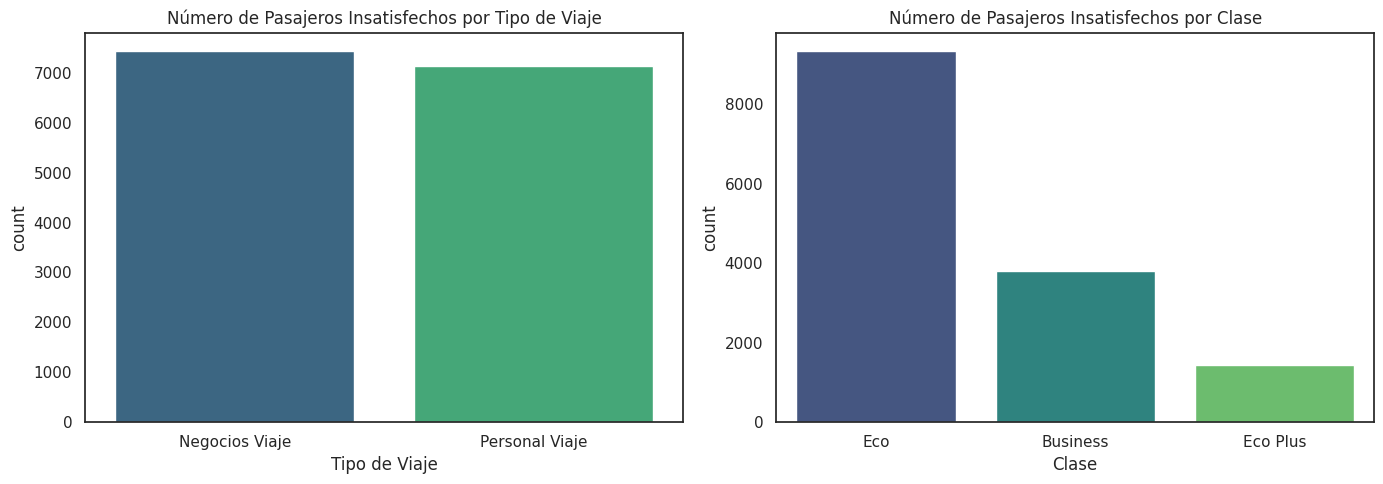

In [ ]:
# Para Entender la Composición de los Insatisfechos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tipo de Viaje
sns.countplot(data=df_insatisfechos, x='Tipo de Viaje', ax=ax1, palette='viridis')
ax1.set_title('Número de Pasajeros Insatisfechos por Tipo de Viaje')

# Gráfico 2: Clase
sns.countplot(data=df_insatisfechos, x='Clase', ax=ax2, palette='viridis')
ax2.set_title('Número de Pasajeros Insatisfechos por Clase')

plt.tight_layout()
plt.show()

Este gráfico presenta un análisis sobre el número de Pasajeros Insatisfechos por Tipo de Viaje y Clase.

**1. Por tipo de viaje:**

En el mismo podemos observar que el número de pasajeros insatisfechos es muy alto en ambos tipos de viaje, lo cual indica que la insatisfacción es un problema generalizado en la aerolínea.El viaje de "Negocios" tiene ligeramente más pasajeros insatisfechos que el "Personal".
Si la aerolínea tiene recursos limitados, podría priorizar primero las quejas de viajeros de negocios, ya que son más numerosas y por lo general son considerados clientes de alto valor (vuelan con frecuencia, gastan, etc.).

**2. Por clase de vuelo:**
- La clase económica (Eco) concentra la mayor cantidad de pasajeros insatisfechos.
- Las clases Business y Eco Plus tienen menos insatisfacción, lo que sugiere que mayores comodidades y servicios contribuyen a una mejor experiencia.
- Mejorar la experiencia en clase económica podría tener un impacto significativo en la reducción de la insatisfacción general, por lo que se deberia revisar comodidad, espacio y servicios básicos.

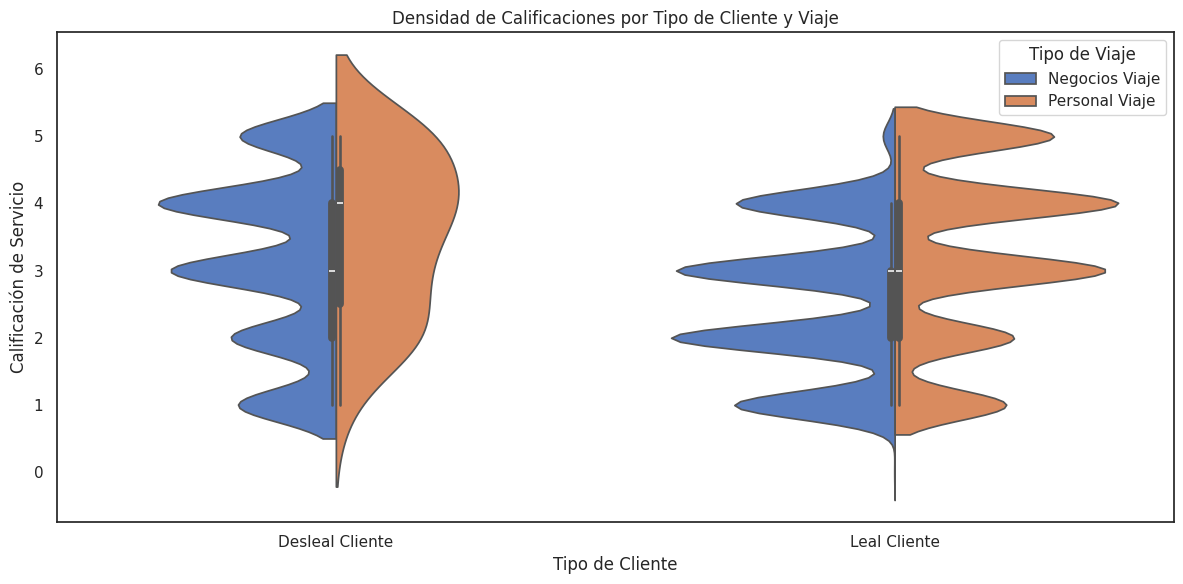

In [ ]:
# Gráfico de Violín para ver densidad de la distribución y comparar grupos.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_insatisfechos, x='Tipo de Cliente', y='Servicio a bordo', hue='Tipo de Viaje',
               palette='muted', split=True)
plt.title('Densidad de Calificaciones por Tipo de Cliente y Viaje')
plt.ylabel('Calificación de Servicio')
plt.tight_layout()

El gráfico evidencia que las calificaciones del servicio a bordo difieren según el tipo de cliente y el motivo del viaje.

Viajes personales reciben valoraciones más altas, incluso entre clientes desleales, lo que indica que este contexto genera experiencias más positivas.
Viajes de negocios muestran evaluaciones más moderadas y dispersas, especialmente entre clientes desleales, lo que podría reflejar expectativas más altas o demandas insatisfechas.

Por otro lado el gráfico nos permite observar que la lealtad del cliente no parece mejorar significativamente la calificación del servicio, por lo que se requiere un enfoque en mejorar la experiencia a bordo, especialmente para pasajeros corporativos.

El desempeño del servicio es mejor percibido en viajes personales, mientras que en el segmento corporativo existe margen para fortalecer la experiencia y fidelizar clientes.

# Modelos supervisados


## Análisis Comparativo de Modelos de Clasificación en la Predicción de la Satisfacción de Pasajeros Aéreos

In [ ]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Preprocesamiento**

In [ ]:
# Convertimos la variable objetivo a numérica
le = LabelEncoder()
df['Satisfacción'] = le.fit_transform(df['Satisfacción'])
# (ej: satisfied=1, neutral/dissatisfied=0)

In [ ]:
# Eliminamos columnas que no aportan (ej: id, flight_number si existen)
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [ ]:
# Convertir variables categóricas en dummies
df = pd.get_dummies(df, drop_first=True)

**Entrenamiento y Prueba**

In [ ]:
X = df.drop('Satisfacción', axis=1)
y = df['Satisfacción']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Escalado**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Entrenar un árbol de decisión
dt = DecisionTreeClassifier(
    criterion='gini',        # o 'entropy'
    max_depth=5,             # controlar para evitar sobreajuste
    min_samples_leaf=20,
    random_state=42
)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [ ]:
# Predicciones
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:,1]  # para ROC/AUC

In [ ]:
# Métricas
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.9030023094688222
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2915
           1       0.90      0.88      0.89      2281

    accuracy                           0.90      5196
   macro avg       0.90      0.90      0.90      5196
weighted avg       0.90      0.90      0.90      5196



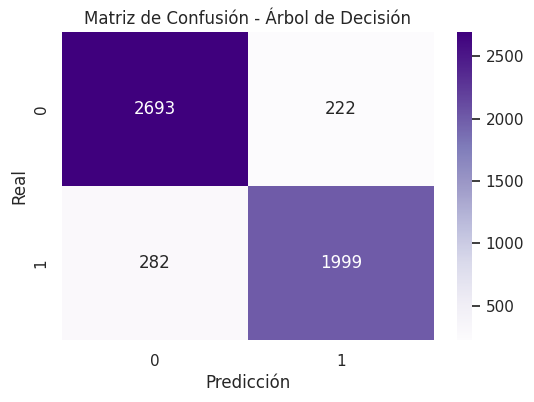

In [ ]:
# Matriz de confusión de Árbol de Decisión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

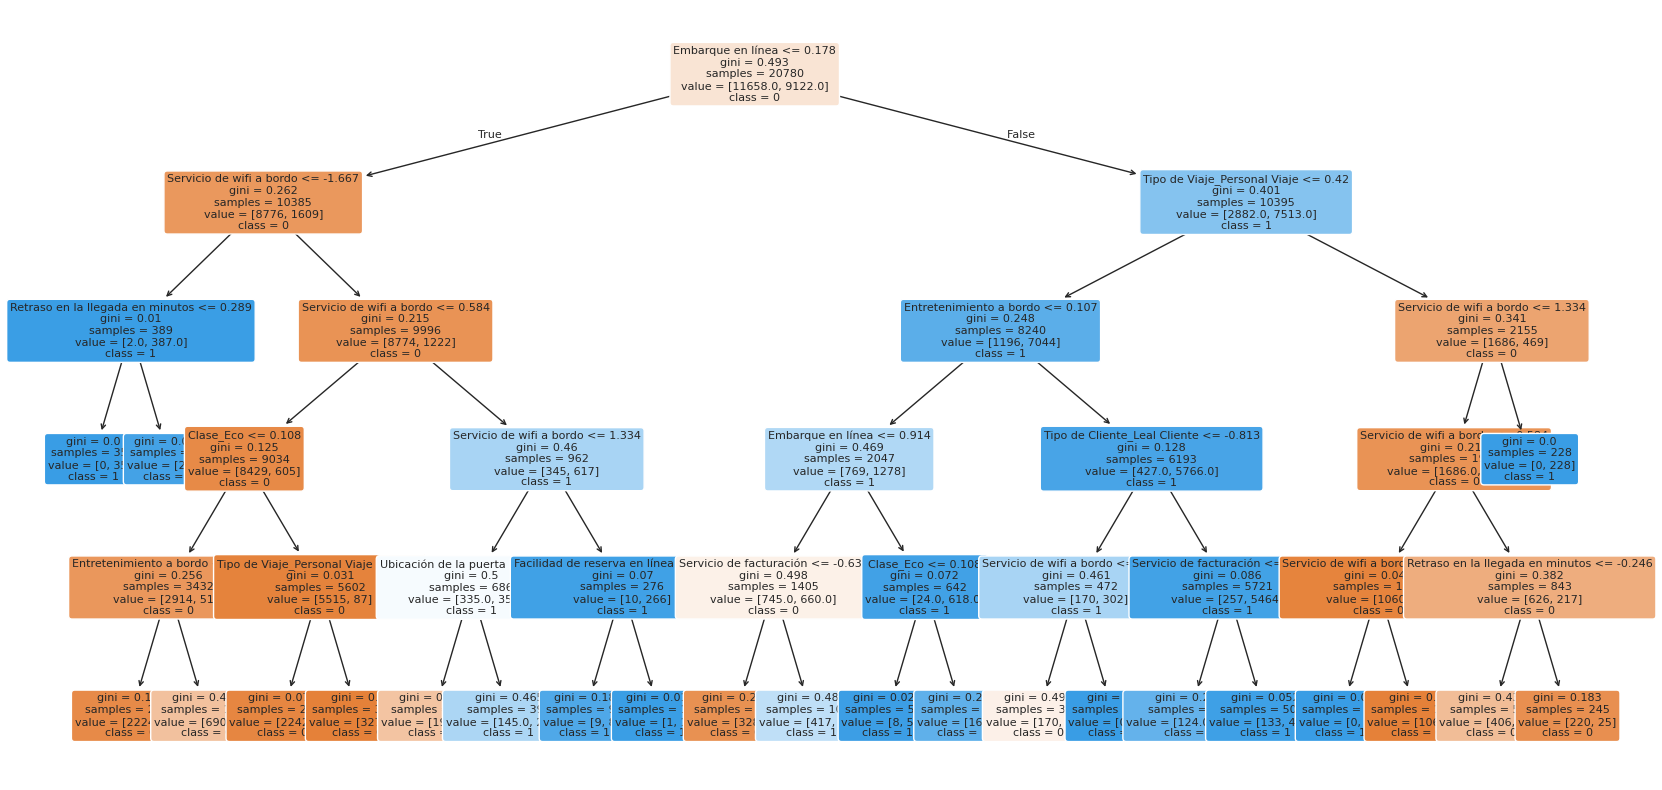

In [ ]:
# Visualización del árbol
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in le.classes_],
    rounded=True,
    fontsize=8
)
plt.show()

**Conclusión del primer modelo de clasificación**

Analizando este primer modelo podemos ver que los resultados arrojados por el  Árbol de Decisión, aplicado a la predicción de la satisfacción de los pasajeros de aerolíneas, mostró un buen desempeño general. Según la matriz de confusión, el clasificador identificó correctamente a 2.693 pasajeros insatisfechos y a 1.999 pasajeros satisfechos, mientras que los errores de clasificación fueron menores (222 falsos positivos y 282 falsos negativos). A su vez, permitió identificar los factores más determinantes en la experiencia del cliente. Entre ellos destacan el embarque en línea, el servicio de WiFi a bordo, el tipo de viaje, la lealtad del cliente y el entretenimiento a bordo.

En términos porcentuales, el modelo logró clasificar correctamente aproximadamente el 92% de los pasajeros insatisfechos y el 88% de los satisfechos, evidenciando un rendimiento equilibrado en ambas clases. Esto sugiere que el algoritmo es confiable para diferenciar entre pasajeros satisfechos e insatisfechos, aunque presenta una ligera tendencia a confundir algunos casos de satisfacción como insatisfacción.

Desde la perspectiva práctica, el modelo constituye una herramienta útil para las aerolíneas, ya que permite anticipar la satisfacción de los clientes y, a partir de ello, diseñar estrategias de mejora en el servicio focalizando esfuerzos en la digitalización del embarque, la conectividad a bordo y la calidad del entretenimiento, sin descuidar la puntualidad.

En resumen, el modelo no solo es eficaz como herramienta predictiva, sino que también brinda insights prácticos para la gestión del servicio, convirtiéndose en una base útil para la toma de decisiones estratégicas orientadas a la fidelización y mejora de la experiencia del pasajero. Sin embargo preferimos contrastarlo con otros modelos de clasificación como Regresión Logística y KNN.

# Modelo 2: Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

📊 Regresión Logística
Accuracy: 0.8731716705157814
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2915
           1       0.86      0.85      0.85      2281

    accuracy                           0.87      5196
   macro avg       0.87      0.87      0.87      5196
weighted avg       0.87      0.87      0.87      5196



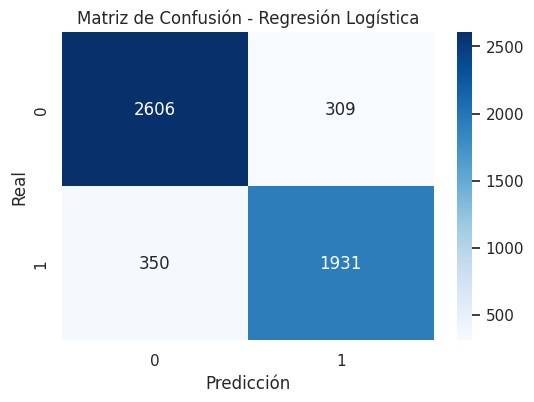

In [ ]:
# Matriz de confusión de Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined and scaled
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Conclusión del segundo modelo de clasificación**

El modelo de Regresión Logística, aplicado a la predicción de la satisfacción de los pasajeros, también mostró un buen nivel de desempeño. De acuerdo con la matriz de confusión, arroja los siguientes resultados:

* Verdaderos Negativos (0 clasificados como 0): 2.606
* Falsos Positivos (0 clasificados como 1): 309
* Falsos Negativos (1 clasificados como 0): 350
* Verdaderos Positivos (1 clasificados como 1): 1.931

Esto significa que el modelo acierta en 89% de los casos de pasajeros insatisfechos (2606 de 2915) y alrededor de aproximadamente 85% de los casos de pasajeros satisfechos (1931 de 2281).

El desempeño es bastante equilibrado en ambas clases, aunque se observa una leve pérdida de sensibilidad en la predicción de pasajeros satisfechos (más falsos negativos).

En términos prácticos, la Regresión Logística constituye una herramienta confiable y fácil de interpretar, capaz de capturar relaciones lineales entre las variables explicativas y la satisfacción de los pasajeros.
Sin embargo, al compararse con el Árbol de Decisión, ofrece menor interpretabilidad en términos de los factores específicos que influyen en la predicción, ya que no muestra reglas de decisión explícitas.

En conclusión, la Regresión Logística constituye un modelo predictivo adecuado para el estudio de la satisfacción de los pasajeros, aportando resultados confiables que pueden servir como base para la toma de decisiones. A continuación, desarrollaremos el tercer modelo de clasificación.

# Modelo 3: K-Nearest-Neighbor (Vecinos cercanos)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # puedes probar diferentes valores de K
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("📊 KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

📊 KNN
Accuracy: 0.9124326404926867
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2915
           1       0.93      0.87      0.90      2281

    accuracy                           0.91      5196
   macro avg       0.91      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



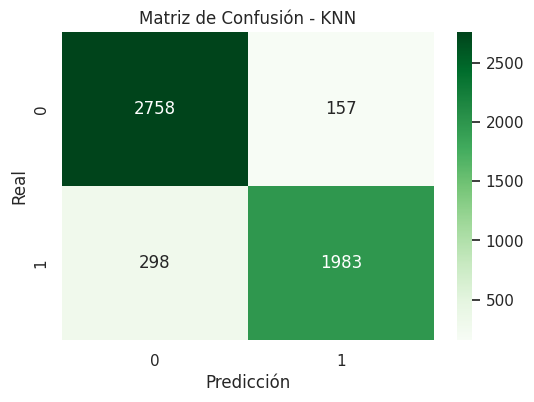

In [ ]:
# Matriz de confusión de KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined and scaled
knn = KNeighborsClassifier(n_neighbors=5)  # puedes probar diferentes valores de K
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Conclusión del tercer modelo de clasificación**

Este tercer modelo presentó un muy buen rendimiento general. Según la matriz de confusión, logró clasificar correctamente a 2.758 pasajeros insatisfechos y a 1.983 pasajeros satisfechos, con un nivel de error relativamente bajo (157 falsos positivos y 298 falsos negativos).

En términos proporcionales, el modelo alcanzó una precisión cercana al 95% en la clasificación de pasajeros insatisfechos y alrededor del 87% en la de pasajeros satisfechos, lo que refleja un buen equilibrio en ambas clases. Estos resultados indican que KNN es especialmente eficaz para identificar correctamente a los pasajeros que no están satisfechos, reduciendo al mínimo los falsos positivos.

La principal característica de este algoritmo es que basa sus predicciones en la similitud entre observaciones, lo que lo hace útil cuando se trabaja con datos en los que las relaciones no son necesariamente lineales. Sin embargo, también implica una mayor exigencia en cuanto a procesamiento computacional cuando los volúmenes de datos son grandes.

En conclusión, KNN demostró ser un modelo predictivo preciso y confiable para el problema planteado, aportando resultados sólidos que pueden servir de base para la identificación de patrones de satisfacción en los pasajeros y la posterior implementación de estrategias de mejora en el servicio.

# Curva ROC y AUC

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que permite evaluar el rendimiento de un modelo de clasificación. Representa la relación entre la tasa de verdaderos positivos (TPR o sensibilidad) y la tasa de falsos positivos (FPR) para diferentes umbrales de decisión.


El AUC (Area Under the Curve) mide el área bajo la curva ROC y resume su desempeño en un solo valor entre 0 y 1. Cuanto más cercano a 1 es el AUC, mejor es la capacidad del modelo para diferenciar entre clases (en este caso, pasajeros satisfechos e insatisfechos).


* Una curva ROC más próxima a la esquina superior izquierda indica mejor rendimiento.


* Un AUC mayor refleja un modelo más preciso y confiable.



AUC Regresión Logística: 0.927394547996237
AUC KNN: 0.9605619695252676
AUC Decision Tree: 0.9654288578254399


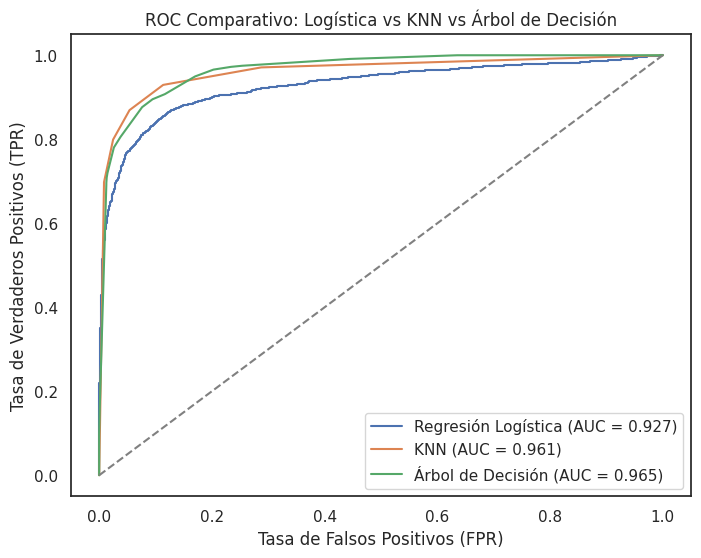

In [ ]:
# ROC / AUC


# Calculate ROC and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
print("AUC Regresión Logística:", auc_log)


# Calculate ROC and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1])
print("AUC KNN:", auc_knn)


fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("AUC Decision Tree:", auc_dt)


plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Regresión Logística (AUC = {auc_log:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.3f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC Comparativo: Logística vs KNN vs Árbol de Decisión")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()




La comparación de las curvas ROC muestra que los tres modelos presentan un buen desempeño, con valores de AUC elevados. El Árbol de Decisión obtuvo el mejor resultado (0.965), seguido muy de cerca por KNN (0.961), mientras que la Regresión Logística presentó un AUC algo menor (0.927). Esto confirma que tanto el Árbol de Decisión como KNN ofrecen una mayor capacidad de discriminación entre pasajeros satisfechos e insatisfechos.



## Conclusión general de los tres modelos de clasificación


El análisis comparativo de los tres modelos aplicados (Árbol de Decisión, Regresión Logística y KNN) muestra que todos lograron un buen desempeño en la predicción de la satisfacción de los pasajeros de aerolíneas, aunque cada uno presenta ventajas y limitaciones específicas.


El Árbol de Decisión destacó por su capacidad de identificar las variables más influyentes en la experiencia del cliente (embarque en línea, WiFi a bordo, tipo de viaje, lealtad del cliente y entretenimiento), lo que lo convierte en una herramienta no solo predictiva, sino también interpretativa y útil para la gestión práctica del servicio. Sin embargo, presentó una ligera tendencia a confundir algunos casos de satisfacción con insatisfacción.


La Regresión Logística mostró un rendimiento equilibrado en ambas clases, con un 89% de aciertos en pasajeros insatisfechos y un 85% en satisfechos. Su principal fortaleza radica en la facilidad de interpretación y la capacidad de capturar relaciones lineales, lo que la hace adecuada en escenarios donde se requiera simplicidad y transparencia. No obstante, pierde algo de precisión respecto de los otros modelos y ofrece menor capacidad explicativa sobre las reglas de decisión.


El KNN se posicionó como el modelo más preciso, alcanzando una efectividad cercana al 95% en insatisfechos y al 87% en satisfechos, con bajos niveles de error. Su fortaleza radica en la alta capacidad de clasificación gracias a la similitud entre observaciones, lo que lo hace especialmente robusto en este caso. Como contrapartida, requiere mayor esfuerzo computacional y su interpretabilidad es limitada en comparación con el Árbol de Decisión o la Regresión Logística.


En síntesis, los tres modelos constituyen herramientas válidas y complementarias:


* KNN: mejor desempeño predictivo.


* Árbol de Decisión: mayor interpretabilidad y valor práctico para la toma de decisiones estratégicas.


* Regresión Logística: simplicidad, equilibrio y fácil implementación.


La elección del modelo más adecuado dependerá de las prioridades estratégicas de la aerolínea: si se busca máxima precisión, KNN es la opción más recomendable; si se prioriza la comprensión de los factores que influyen en la satisfacción, el Árbol de Decisión es más útil; y si se valora la simplicidad y la transparencia, la Regresión Logística constituye una alternativa confiable.

